In [19]:
# Importing important libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb
from sklearn.utils import resample
# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('C:/Users/USER/Downloads/creditcard.csv')

In [5]:
duplicate_rows = data.duplicated().sum()
print(f'Duplicate rows: {duplicate_rows}')

# Drop duplicates
data = data.drop_duplicates()

# Verify dataset shape
print(f'Data shape after removing duplicates: {data.shape}')

Duplicate rows: 1081
Data shape after removing duplicates: (283726, 31)


In [8]:


# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Feature scaling for 'Amount'
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [14]:
 #Handling Class Imbalance (SMOTE)
# Initialize SMOTE
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training set (assuming X_train and y_train are defined)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
smote = SMOTE(random_state=42)

# Resample the training set
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify class distribution after SMOTE
#print(f'Class distribution after SMOTE:\n{pd.Series(y_train_resampled).value_counts()}')

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Logistic Regression AUC: {roc_auc_score(y_test, y_pred_proba):.2f}")
print(f"Logistic Regression Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred):.2f}")


Logistic Regression Accuracy: 0.97
Logistic Regression AUC: 0.94
Logistic Regression Precision: 0.04
Logistic Regression Recall: 0.84


In [32]:
#
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

# Initialize RandomForestClassifier with reduced parameters
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=1, random_state=42)

# Use a smaller subset of data
X_train_small, y_train_small = resample(X_train_resampled, y_train_resampled, n_samples=1000, random_state=42)

# Fit the model
rf_model.fit(X_train_small, y_train_small)
# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)



RandomForestClassifier()

In [34]:
# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)

 #Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

print(f"Random Forest AUC: {roc_auc_score(y_test, y_pred_rf_proba):.2f}")

# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

print(f"XGBoost AUC: {roc_auc_score(y_test, y_pred_xgb_proba):.2f}")


Random Forest AUC: 0.97
XGBoost AUC: 0.97


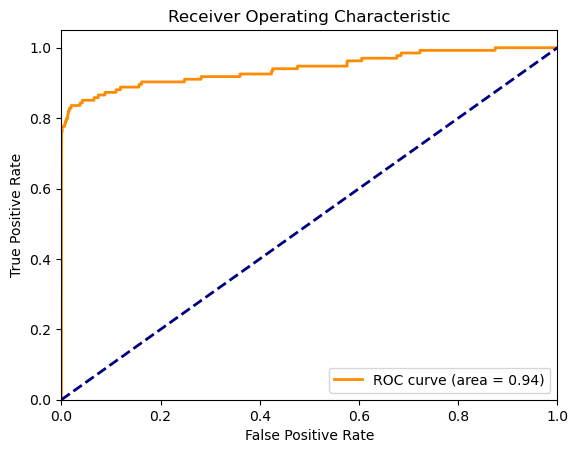

In [26]:
#Step 5: Evaluating Model Performancefrom sklearn.metrics import roc_curve, auc
#AUC-ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Example usage:
# Assuming `log_reg` is your trained model and `X_test` and `y_test` are your test data
plot_roc_curve(log_reg, X_test, y_test)


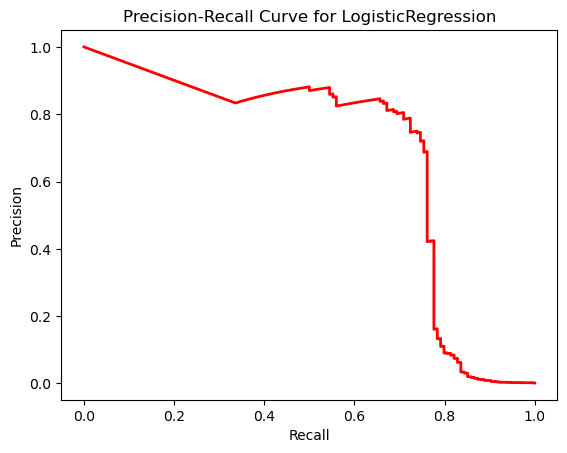

In [24]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

    plt.figure()
    plt.plot(recall, precision, color='red', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model.__class__.__name__}')
    plt.show()

# Example usage:
plot_precision_recall_curve(log_reg, X_test, y_test)


In [25]:
# Adjust classification threshold
y_pred_adjusted = (y_pred_proba > 0.3).astype(int)  # Adjust threshold to 0.3

print(f"Precision: {precision_score(y_test, y_pred_adjusted):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_adjusted):.2f}")


Precision: 0.02
Recall: 0.87


In [35]:
#Conclusion:
#This framework covers data preprocessing, class balancing, and model training while focusing on metrics that are critical for fraud detection. By minimizing false negatives, you're ensuring that more fraud cases are captured.